## Healthcare data analytics

Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

The healthcare sector has long been an early adopter of and benefited greatly from technological advances. These days, machine learning plays a key role in many health-related realms, including the development of new medical procedures, the handling of patient data, staff management & more.

**Dataset Link**
https://www.kaggle.com/datasets/anmolkumar/janatahack-healthcare-analytics-part-2?select=train.csv

In [1]:
from IPython import display

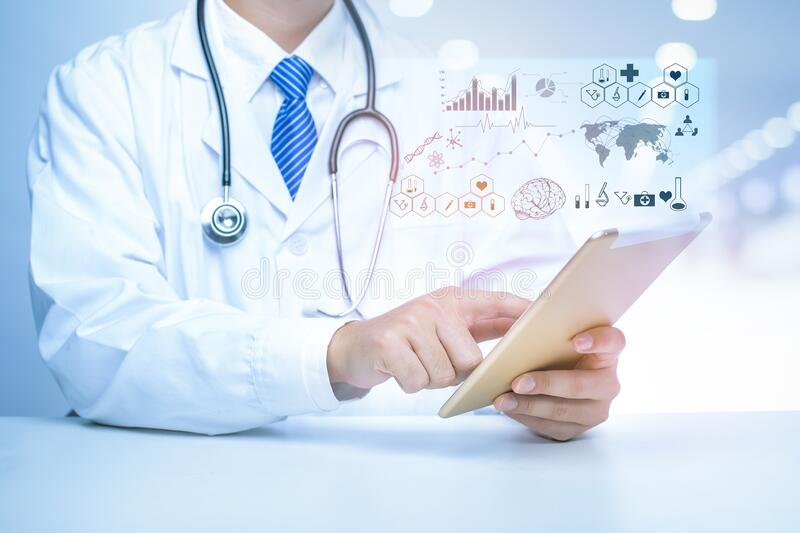

In [18]:
display.Image("HC-data.jpg")

### Data Dictionary 


<table>
<tr>
<td>Column</td>
<td>Description</td>
</tr>
<tr>
<td>case_id</td>
<td>Case_ID registered in Hospital</td>
</tr>  
<tr>
<td>Hospital_code</td>
<td>Unique code for the Hospital</td>
</tr> 
<tr>
<td>Hospital_type_code</td>
<td>Unique code for the type of Hospital</td>
</tr> 
 <tr>
<td>City_Code_Hospital</td>
<td>Code of the Hospital</td>
</tr> 
<tr>
<td>Hospital_region_code</td>
<td>Region Code of the Hospital</td>
</tr> 
<tr>
<td>Available Extra Rooms in Hospital</td>
<td>Number of Extra rooms available in the Hospital</td>
</tr> 
<tr>
<td>Department</td>
<td>Department overlooking the case</td>
</tr> 
<tr>
<td>Ward_Type</td>
<td>Code for the Ward type</td>
</tr> 
<tr>
<td>Ward_Facility_Code</td>
<td>Code for the Ward Facility</td>
</tr> 
<tr>
<td>Bed Grade</td>
<td>Condition of Bed in the Ward</td>
</tr> 
<tr>
<td>patientid</td>
<td>Unique Patient Id</td>
</tr> 
<tr>
<td>City_Code_Patient</td>
<td>City Code for the patient</td>
</tr> 
<tr>
<td>Type of Admission</td>
<td>Admission Type registered by the Hospital</td>
</tr> 
<tr>
<td>Severity of Illness</td>
<td>Severity of the illness recorded at the time of admission</td>
</tr>
<tr>
<td>Visitors with Patient</td>
<td>Number of Visitors with the patient</td>
</tr> 
<tr>
<td>Age</td>
<td>Age of the patient</td>
</tr>
<tr>
<td>Admission_Deposit</td>
<td>Deposit at the Admission Time</td>
</tr>
<tr>
<td>Stay</td>
<td>Stay Days by the patient</td>
</tr> 
</table>

In [3]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# For Plot Annotation

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

#### Data Gathering

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


### Data Accessing

In this section we are going to check the Quality and Tidiness of the data.

We are going to investigate the data.

In [7]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [8]:
df.shape

(318438, 18)

In [9]:
print('we have {} rows in our dataset'.format(df.shape[0]))
print('we have {} columns in our dataset'.format(df.shape[1]))

we have 318438 rows in our dataset
we have 18 columns in our dataset


In [10]:
integer_data = df.dtypes[df.dtypes == 'int64'].count()
float_data = df.dtypes[df.dtypes == 'float64'].count()
object_data = df.dtypes[df.dtypes == 'object'].count()

In [11]:
# Knowing the columns 
integer_data_index = df.dtypes[df.dtypes == 'int64'].index
contineous_data_index = df.dtypes[df.dtypes == 'float64'].index
categorical_data_index = df.dtypes[df.dtypes == 'object'].index

In [12]:
print('we have {} integer data type columns'.format(integer_data))
print('we have {} float data type columns'.format(float_data))
print('we have {} object data type columns'.format(object_data))

we have 6 integer data type columns
we have 3 float data type columns
we have 9 object data type columns


In [13]:
(df.isnull().sum()/len(df)) * 100

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [16]:
## Value counts of each categorical 

# Counts on categorical columns
for feature in categorical_data_index:
    print(feature,':')
    print(df[feature].value_counts(normalize=True))
    print('----------------------------')

Hospital_type_code :
a    0.450402
b    0.216513
c    0.144229
e    0.077786
d    0.064028
f    0.033611
g    0.013431
Name: Hospital_type_code, dtype: float64
----------------------------
Hospital_region_code :
X    0.418719
Y    0.384464
Z    0.196817
Name: Hospital_region_code, dtype: float64
----------------------------
Department :
gynecology            0.783468
anesthesia            0.093108
radiotherapy          0.089550
TB & Chest disease    0.030103
surgery               0.003772
Name: Department, dtype: float64
----------------------------
Ward_Type :
R    0.401796
Q    0.333393
S    0.244299
P    0.015846
T    0.004638
U    0.000028
Name: Ward_Type, dtype: float64
----------------------------
Ward_Facility_Code :
F    0.354081
E    0.173820
D    0.162697
C    0.111365
B    0.110401
A    0.087634
Name: Ward_Facility_Code, dtype: float64
----------------------------
Type of Admission :
Trauma       0.478150
Emergency    0.369541
Urgent       0.152309
Name: Type of Admission, d

In [15]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


**Observation**

* The total records (row) in the dataset is **318438**

* The total features (column) in the dataset is **18**

* We have 9 Numeric features (Contineous and discrete) and 9 categorical features in the dataset.

* There are 2 columns with missing values **City_Code_Patient** and **Bed Grade**

* The missing valuesare **1.42%** and **0.35%** respectively

* The Data is Tidy

### Data Cleaning

In this section we are going to be cleaning our data for better analysis, which means we are going to drop every rows that has missing values on **City_Code_Patient or Bed Grade**

In [181]:
df[df['City_Code_Patient'].isnull()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096.0,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098.0,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776.0,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988.0,11-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318198,318199,23,a,6,X,2,anesthesia,Q,F,3.0,58469,NaN,Urgent,Minor,2,11-20,4432.0,11-20
318263,318264,28,b,11,X,3,anesthesia,R,F,3.0,66803,NaN,Trauma,Moderate,2,31-40,5415.0,11-20
318269,318270,26,b,2,Y,3,gynecology,R,D,4.0,95483,NaN,Trauma,Minor,5,51-60,4135.0,51-60
318271,318272,28,b,11,X,2,gynecology,R,F,4.0,117128,NaN,Emergency,Minor,2,61-70,3418.0,0-10


In [182]:
df = df.dropna(subset=['City_Code_Patient', 'Bed Grade']).reset_index(drop=True)

In [183]:
df.shape

(313793, 18)

**Observation**

* We have been able to address the missing values in data.

## Data Visualization

In [184]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [185]:
df['Hospital_type_code'].value_counts()

a    141071
b     68125
c     45352
e     24286
d     20161
f     10561
g      4237
Name: Hospital_type_code, dtype: int64

In [186]:
df['Type of Admission'].value_counts()

Trauma       150252
Emergency    115564
Urgent        47977
Name: Type of Admission, dtype: int64

In [187]:
df['Severity of Illness'].value_counts()

Moderate    173425
Minor        84319
Extreme      56049
Name: Severity of Illness, dtype: int64

In [188]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [189]:
# convert categorical data into ordered categorical types
ordinal_var_dict = {'Hospital_type_code': ['g','f','e','d','c','b','a'],
                    'Hospital_region_code': ['Z', 'Y', 'X'],
                    'Ward_Type': ['U', 'T', 'S', 'R', 'Q', 'P'],
                   'Ward_Facility_Code':['F','E','D','C','B','A'],
                   'Severity of Illness':['Extreme','Moderate','Minor'],
                   'Type of Admission':['Emergency','Urgent','Trauma'],
                   'Age':['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'],
                   'Stay':['More than 100 Days','91-100','81-90','71-80','61-70','51-60','41-50','31-40','21-30',
                           '11-20','0-10']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

Most of the Variables in the Categorical data are **Ordinal** measurement of data level, which has been converted using pandas categorical data type.

### Univariate Analysis

In this section we are going to be exploring variables independently.

#### Question 1

For How long did Patient **Stay**.

In [190]:
default_color = sns.color_palette()[0]

Text(0.5, 0, 'Number of time each stay occurs')

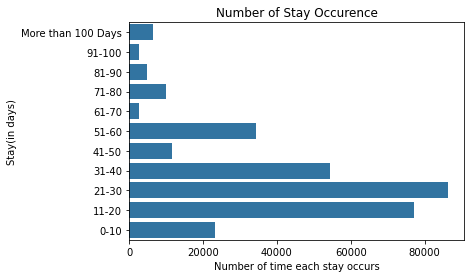

In [191]:
plt.title('Number of Stay Occurence')
sns.countplot(data=df, y='Stay', color=default_color)
plt.ylabel('Stay(in days)')
plt.xlabel('Number of time each stay occurs')

**Observation**

* 21-30 days and 11-20 days has the highest days of Patient **Stay**.

* 61-70 days and 91-100 has the least days of Patient **Stay**.

## Question 2

Which Ward Type admit patient the most and least in time of their stays in the hospital.

Text(0, 0.5, 'Number of occurence per Ward Type')

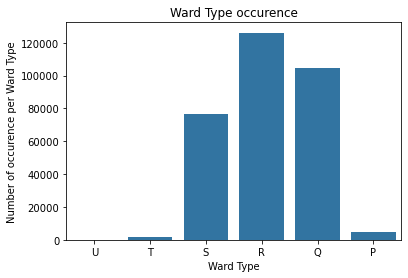

In [192]:
plt.title('Ward Type occurence')
sns.countplot(data=df, x='Ward_Type', color=default_color)
plt.xlabel('Ward Type')
plt.ylabel('Number of occurence per Ward Type')

**Observation**

* Most patient are admitted to **R** ward type
* Least patient are admitted to **U** ward type

### Question 3

Which Department has the most admitted patient?

Text(0.5, 0, 'Number of Department occurence')

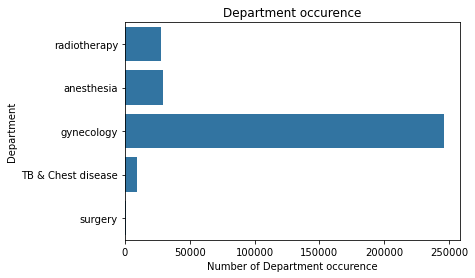

In [193]:
plt.title('Department occurence')
sns.countplot(data=df, y='Department', color=default_color)
plt.ylabel('Department')
plt.xlabel('Number of Department occurence')

**Observation**

* Most pateint are admitted to Gynecology department.

* Radiotherapy and anesthesia has relative the same admission into the department.

* Surgery department as the least admission.

### Question 4

Which Severity of Ilness brought most patient to the Hospital?

Text(0, 0.5, 'Number of Severity of Illness occurence')

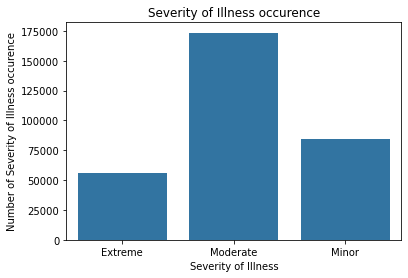

In [194]:
plt.title('Severity of Illness occurence')
sns.countplot(data=df, x='Severity of Illness', color=default_color)
plt.xlabel('Severity of Illness')
plt.ylabel('Number of Severity of Illness occurence')

**Observation**

Most the patient visit for **Moderate** and **Minor** Severity of Ilness.

## Question 5

Top 5 most visting patient code admitted.

In [195]:
def var_count(df, var):
    plot = df[var].value_counts().nlargest().plot(kind='bar')

Text(0, 0.5, 'Number of occurence')

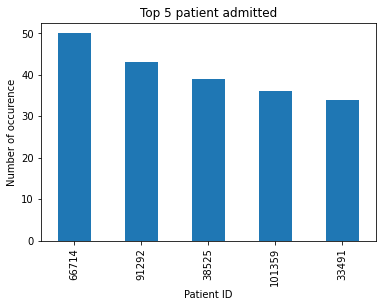

In [196]:
plt.title('Top 5 patient admitted')
var_count(df, 'patientid')
plt.xlabel('Patient ID')
plt.ylabel('Number of occurence')

**Observation**

* Patient **66714** visted the hospital 50 times, which is the patient with highest number of occurence.

### Question 6

Which type of hospital is visted the most?

Text(0, 0.5, 'Number of occurence')

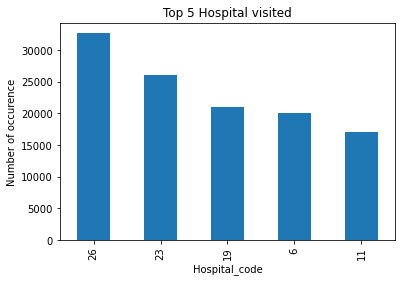

In [197]:
plt.title('Top 5 Hospital visited')
var_count(df, 'Hospital_code')
plt.xlabel('Hospital_code')
plt.ylabel('Number of occurence')

**Observation**

* Hospital code **26** is visted more than 30,000 times in the dataset.

## Question 7

Age group frequency.

Text(0, 0.5, 'Number of occurence')

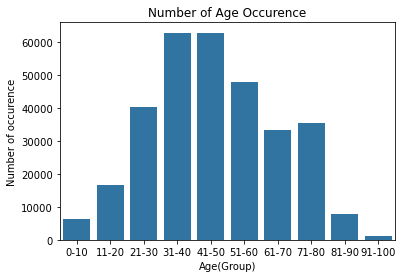

In [198]:
plt.title('Number of Age Occurence')
sns.countplot(data=df, x='Age', color=default_color)
plt.xlabel('Age(Group)')
plt.ylabel('Number of occurence')

**Observation**

* Most Age group falls between 31-40 and 41-50 Age Group

* The Age group distribution looks Uni-model

### Question 8

Admission Deposit Distribution

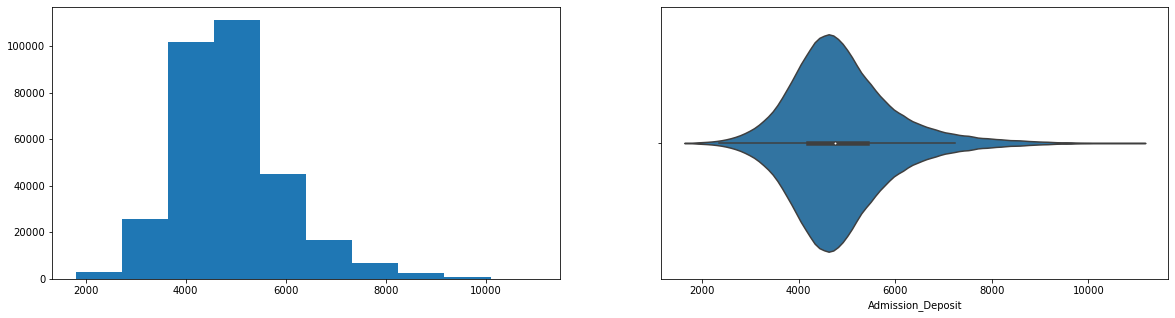

In [199]:
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
plt.hist(data = df, x = 'Admission_Deposit');

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.violinplot(data = df, x = 'Admission_Deposit');

**Observation**

* Most patient admission deposit falls between 4000 - 5000.

* The admission deposit distribution is right skewed.

## BI-Variate Analysis

In this section,we are going to be comparing 2 variables at a time.

### Question 9

Which type of **Severity of Ilness** as **the most Stay**

<AxesSubplot:xlabel='Severity of Illness', ylabel='Stay'>

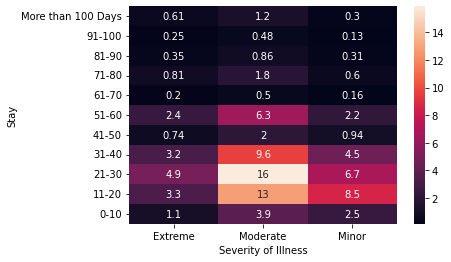

In [200]:
sns.heatmap(pd.crosstab(df['Stay'],df['Severity of Illness'], normalize=True)*100, annot=True)

**Observation**

* 21-30 days stays has 16% of Moderate Ilness and 4.9% of Extreme Ilness

* 11-20 days has 8.5% of Minor Ilness.

### Question 10

Average Admission deposit per Severity of Ilness in the Hospital.

<AxesSubplot:title={'center':'Average Admission deposit per Severity of Ilness in the Hospital.'}, xlabel='Severity of Illness', ylabel='Admission_Deposit'>

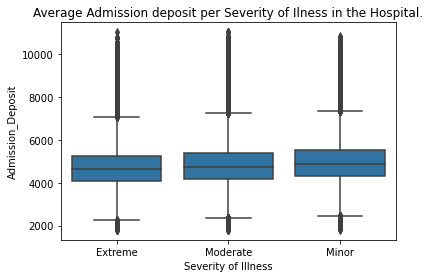

In [201]:
plt.title('Average Admission deposit per Severity of Ilness in the Hospital.')
sns.boxplot(data=df, x='Severity of Illness', y='Admission_Deposit',color=default_color)

**Observation**

* On Average the admission deposit per severity of ilness are the same. They are around about 4500.

### Questioon 11

Department distribution in **Age** and **Hospital_region_code**

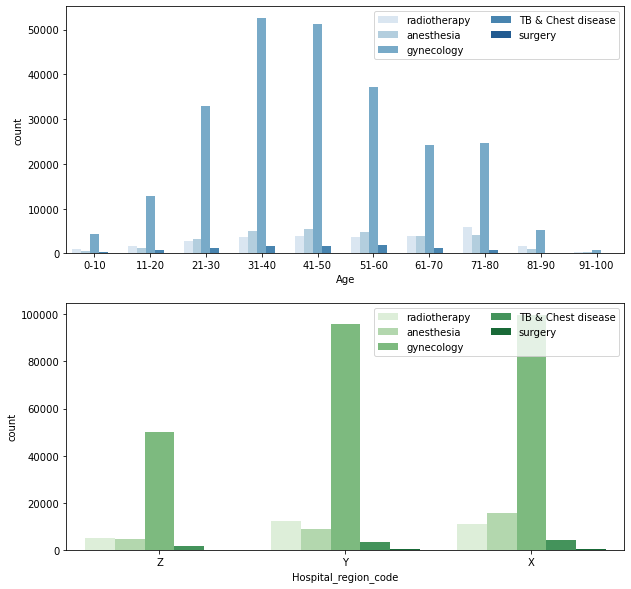

In [202]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 10])

# subplot 1
ax = plt.subplot(2, 1, 1)
sns.countplot(data = df, x = 'Age', hue = 'Department', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 2 
ax = plt.subplot(2, 1, 2)
sns.countplot(data = df, x = 'Hospital_region_code', hue = 'Department', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

**Observation**

* The Gynecology department dominate both Age and Hospital region in the dataset.

### Question 12

Type of admission per **Stay**

<AxesSubplot:title={'center':'Type of admission per Stay'}, xlabel='count', ylabel='Stay'>

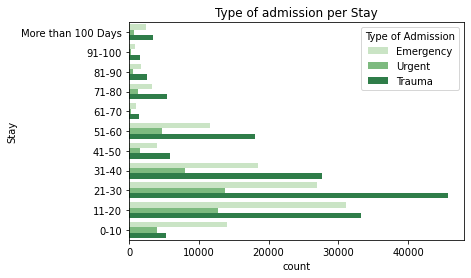

In [203]:
plt.title('Type of admission per Stay')
sns.countplot(data = df, y = 'Stay', hue = 'Type of Admission', palette = 'Greens')

**Observation**

* At 0-10 days of stay most patient are admitted into Emergency.

* Other days of stay most patient are admitted into Trauma.

## Multi-variate Analysis

In this section we are going to be exploring 3 variables at a time.

### Question 13

Age distribution per Admission Deposit and Severity of Illness.

<module 'matplotlib.pyplot' from 'C:\\Users\\THIS PC\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

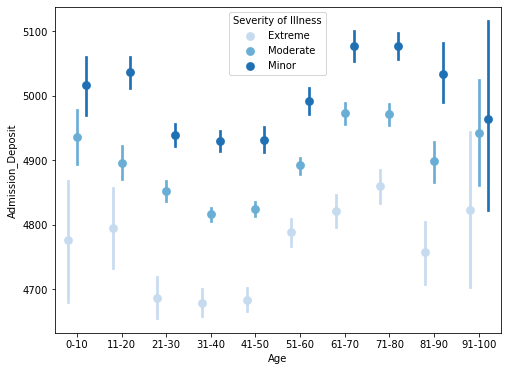

In [204]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x = 'Age', y = 'Admission_Deposit', hue = 'Severity of Illness',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt

**Observation**

* The **Minor** Severity of Ilness has the largest proportion with respect to age and Admission deposit.

### Question 14

Stay vs Ward type vs Admission Deposit.

C:\Users\THIS PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\THIS PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


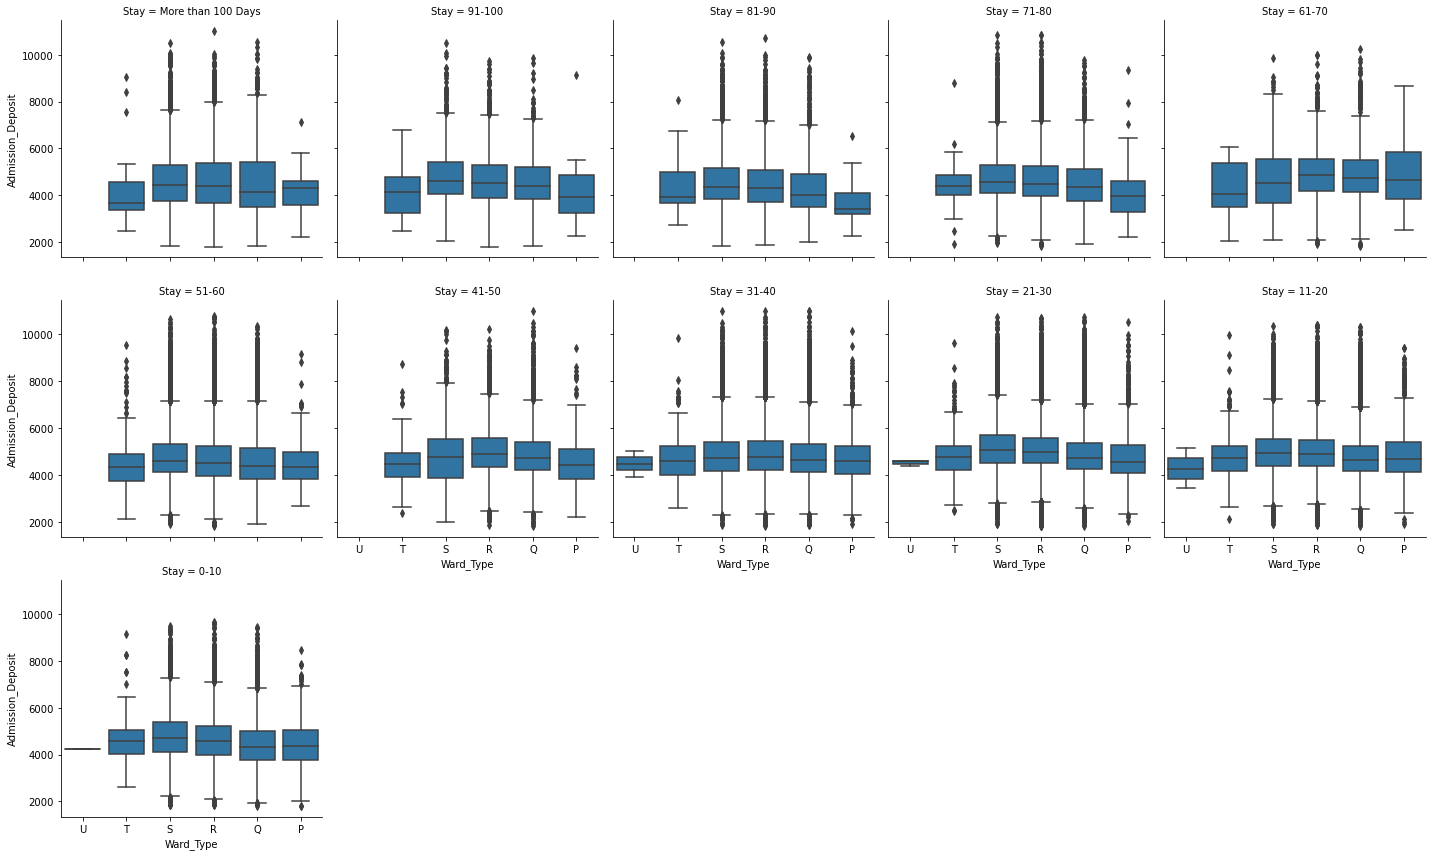

In [221]:
g = sns.FacetGrid(data = df, col = 'Stay', size = 4, col_wrap=5)
g.map(sns.boxplot, 'Ward_Type', 'Admission_Deposit')

**Observation**

* Most patient did not require admission deposit at U ward type. Only stay 0-10, 11-20, 21-30 and 31-40 use the ward U, while 11-20 and 31-40 have better distribution.

### Question 15

Correlation analysis of the numeric data.

<AxesSubplot:>

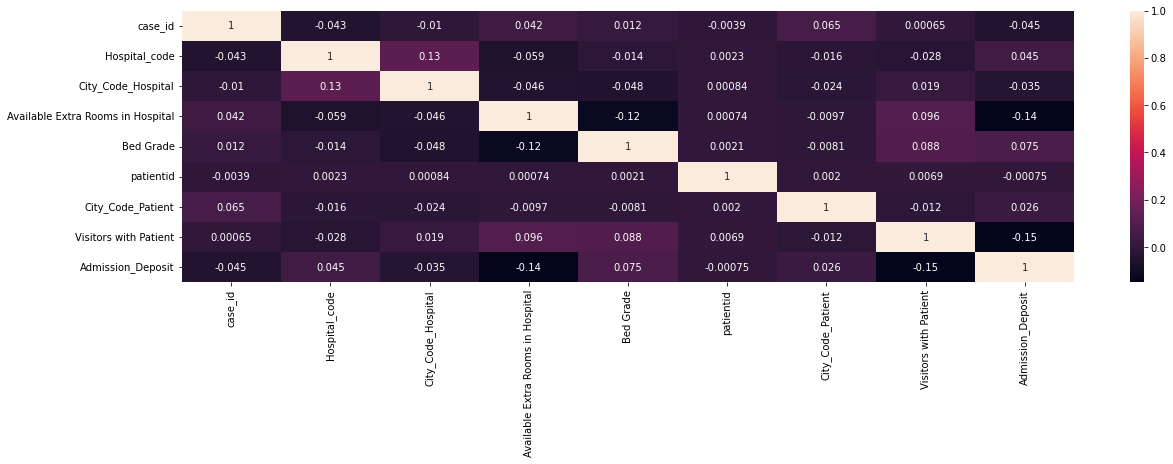

In [226]:
plt.figure(figsize = [20, 5]) 
sns.heatmap(df.corr(), annot=True)

**Observation**

* City code Hospital and Hospital code has 13% correlation.

* City code Hospital and Hospital code are positive weakly correlated.

* Admission deposit and Available Extra rooms in Hospital are negative weakly correlated.